<a href="https://colab.research.google.com/github/cristianleoo/cristianleoo.github.io/blob/main/Appointments_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [494]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [495]:
data_appointments = pd.read_csv('/content/drive/MyDrive/CDL Api Files/data_appointments.csv').drop(['Unnamed: 0'], axis=1)
data_appointments.head()

,Id_x,AppointmentBlockId,StartTime,EndTime,StudentId_x,StudentName,Topic,PreferredLocationId,PreferredLocationName,Location,...,Term,Program Shortcut,YOE,Employment Status at Beginning of Program,Desired Industry,Graduation Term,Attendance,AppointmentId,StudentId,UNI
0,220007404091909,200006052546640,2023-04-25T19:00:00.000,2023-04-25T19:30:00.000,540016052086221,Jia Hu,NaN,1.000760e+13,Virtual,NaN,...,Spring,APAN,0 - 3 Years,No,Finance,Fall 2022,No,220007404091909,540016052086221,jh4390
1,220007404095822,200006052497281,2023-04-21T15:00:00.000,2023-04-21T15:30:00.000,540016051803702,Samantha Nelson,NaN,1.000760e+13,Virtual,Virtual,...,Spring,NOPM,5+ Years,No,Nonprofit Management,Spring 2022,No,220007404095822,540016051803702,svn2108
2,220007404091908,200006052546671,2023-04-20T19:30:00.000,2023-04-20T20:00:00.000,540016052086221,Jia Hu,NaN,1.000760e+13,Virtual,NaN,...,Spring,APAN,0 - 3 Years,No,Finance,Fall 2022,No,220007404091908,540016052086221,jh4390
3,220007404095654,200006052502997,2023-04-18T18:45:00.000,2023-04-18T19:15:00.000,540016052753780,Cheng Ye,NaN,1.000760e+13,Virtual,Virtual,...,Spring,APAN,NaN,NaN,NaN,NaN,No,220007404095654,540016052753780,cy2696
4,220007404091489,200006052540818,2023-04-18T18:15:00.000,2023-04-18T18:45:00.000,540016052753930,Philip Spiler,NaN,1.000760e+13,Virtual,NaN,...,Spring,SPORT,3 - 5 Years,Yes,Sports,Spring 2026,No,220007404091489,540016052753930,pms2179


In [496]:
students = pd.read_csv('/content/drive/MyDrive/CDL Api Files/students.csv').drop(['Unnamed: 0'], axis=1)
display(len(students))
list(students.columns)

13591

['RoleId',
 'StudentGroups',
 'FullName',
 'IsLgbtq',
 'SelfIdentifiedGenderDescription',
 'ParentEducationLevelId',
 'ParentEducationLevelName',
 'DoesParentHaveJD',
 'AbaGraduateId',
 'IsMultipleEnrollmentLinkedAccount',
 'OutcomeStatusInternship',
 'OutcomeStatusPostGraduation',
 'ReportingCategoryMbaCseaPostGraduation',
 'ReportingCategoryMbaCseaInternship',
 'Id',
 'FirstName',
 'MiddleName',
 'LastName',
 'EmailAddress',
 'GraduationYearId',
 'GraduationClass',
 'GraduationTerm',
 'StudentId',
 'IsAlumni',
 'IncludeInResumeBook',
 'PreferredEmailAddress',
 'JoinDate',
 'IsEnrolled',
 'LinkedInProfileUrl',
 'IsTransferStudent',
 'DeclineToStateIsTransferStudent',
 'HasPhoto',
 'AssignedAdvisor',
 'AssignedAdvisor2',
 'AssignedAdvisor3',
 'AssignedAdvisor4',
 'AssignedAdvisor5',
 'SubInfoDisplay',
 'CountryOfCitizenship1',
 'CountryOfCitizenship2',
 'CountryOfCitizenship',
 'DualCountryOfCitizenship',
 'PreferredConsolidatedIndustry',
 'PreferredConsolidatedIndustry2',
 'PreferredC

In [497]:
appointments_report = pd.read_excel('/content/drive/MyDrive/CDL Api Files/appointment_report.xlsx')
display(len(appointments_report))
appointments_report.head()

/usr/local/lib/python3.9/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


6556

,Student,Email Address,Career Adviser,Date and Time,Appointment Date,First Name,Last Name,Email Address.1,Preferred Location,Career Adviser.1,...,Phone Number,Graduation Term,Desired Industry,Desired City,Attendance,Country of Citizenship,Graduate GPA,Employment Status at Beginning of Program,YOE,No Show
0,Jia Hu,jh4390@columbia.edu,Tiya McIver,"04/25/2023, 3:00PM - 3:30PM EDT","04/25/2023, 3:00PM EDT",Jia,Hu,jh4390@columbia.edu,Tiya McIver Virtual Room: https://columbiasps....,Tiya McIver,...,NaN,Fall 2022,Finance,New York - NY,NaN,China Mainland,NaN,No,0 - 3 Years,NaN
1,Jia Hu,jh4390@columbia.edu,Tiya McIver,"04/20/2023, 3:30PM - 4:00PM EDT","04/20/2023, 3:30PM EDT",Jia,Hu,jh4390@columbia.edu,Tiya McIver Virtual Room: https://columbiasps....,Tiya McIver,...,NaN,Fall 2022,Finance,New York - NY,NaN,China Mainland,NaN,No,0 - 3 Years,NaN
2,Philip Spiler,pms2179@columbia.edu,Dorlene Curwen,"04/18/2023, 2:15PM - 2:45PM EDT","04/18/2023, 2:15PM EDT",Philip,Spiler,pms2179@columbia.edu,Dorlene Curwen Virtual Room: https://columbias...,Dorlene Curwen,...,NaN,Spring 2026,Sports,New York - NY,NaN,United States (USA),NaN,Yes,3 - 5 Years,NaN
3,Nan Chen,nc3019@columbia.edu,Tiya McIver,"04/14/2023, 9:30AM - 10:00AM EDT","04/14/2023, 9:30AM EDT",Nan,Chen,nc3019@columbia.edu,Tiya McIver Virtual Room: https://columbiasps....,Tiya McIver,...,NaN,Fall 2024,Finance,NaN,NaN,NaN,NaN,No,0 - 3 Years,NaN
4,Rongrong Chen,rc3533@columbia.edu,Tiya McIver,"04/14/2023, 9:00AM - 9:30AM EDT","04/14/2023, 9:00AM EDT",Rongrong,Chen,rc3533@columbia.edu,Tiya McIver Virtual Room: https://columbiasps....,Tiya McIver,...,NaN,Spring 2027,Technology,New York - NY,NaN,China Mainland,NaN,No,0 - 3 Years,NaN


In [498]:
appointments_report = appointments_report[['Student Id', 'YOE', 'Employment Status at Beginning of Program', 'Desired Industry', 'Graduation Term']].drop_duplicates(subset='Student Id')
students_merged = students.merge(appointments_report, left_on='StudentId', right_on='Student Id', how='left').drop('GraduationTerm', axis=1)
students_merged.dropna(axis=1, how='all')
display(len(students_merged))
list(students_merged.columns)

13591

['RoleId',
 'StudentGroups',
 'FullName',
 'IsLgbtq',
 'SelfIdentifiedGenderDescription',
 'ParentEducationLevelId',
 'ParentEducationLevelName',
 'DoesParentHaveJD',
 'AbaGraduateId',
 'IsMultipleEnrollmentLinkedAccount',
 'OutcomeStatusInternship',
 'OutcomeStatusPostGraduation',
 'ReportingCategoryMbaCseaPostGraduation',
 'ReportingCategoryMbaCseaInternship',
 'Id',
 'FirstName',
 'MiddleName',
 'LastName',
 'EmailAddress',
 'GraduationYearId',
 'GraduationClass',
 'StudentId',
 'IsAlumni',
 'IncludeInResumeBook',
 'PreferredEmailAddress',
 'JoinDate',
 'IsEnrolled',
 'LinkedInProfileUrl',
 'IsTransferStudent',
 'DeclineToStateIsTransferStudent',
 'HasPhoto',
 'AssignedAdvisor',
 'AssignedAdvisor2',
 'AssignedAdvisor3',
 'AssignedAdvisor4',
 'AssignedAdvisor5',
 'SubInfoDisplay',
 'CountryOfCitizenship1',
 'CountryOfCitizenship2',
 'CountryOfCitizenship',
 'DualCountryOfCitizenship',
 'PreferredConsolidatedIndustry',
 'PreferredConsolidatedIndustry2',
 'PreferredConsolidatedIndustry

In [499]:
students_term = students_merged.groupby('Graduation Term')['Student Id'].count().reset_index(name='grad_term_count')

term_map = {
    'Spring 2009': 1, 'Spring 2011': 2, 'Spring 2012': 3, 
    'Fall 2013': 4, 'Spring 2014': 5, 'Spring 2016': 6,
    'Fall 2016': 7, 'Spring 2017': 8, 'Spring 2018': 9, 'Summer 2018': 10,
    'Spring 2019': 11, 'Summer 2019': 12, 'Fall 2019': 13,
    'Spring 2020': 14, 'Summer 2020': 15, 'Fall 2020': 16,
    'Spring 2021': 17, 'Summer 2021': 18, 'Fall 2021': 19,
    'Spring 2022': 20, 'Summer 2022': 21, 'Fall 2022': 22,
    'Spring 2023': 23, 'Summer 2023': 24, 'Fall 2023': 25,
    'Spring 2024': 26, 'Summer 2024': 27, 'Fall 2024': 28,
    'Spring 2025': 29, 'Summer 2025': 30, 'Fall 2025': 31,
    'Spring 2026': 32, 'Summer 2026': 33, 'Fall 2026': 34,
    'Spring 2027': 35, 'Summer 2027': 36, 'Fall 2027': 37
}

students_term['Graduation Term'] = students_term['Graduation Term'].replace(term_map)
data_appointments['Graduation Term'] = data_appointments['Graduation Term'].replace(term_map)
data_appointments['Graduation Term'] = data_appointments['Graduation Term'].fillna(method='ffill')
data_appointments['Graduation Term'].unique()

students_term.head()

,Graduation Term,grad_term_count
0,4,1
1,7,1
2,13,5
3,16,32
4,19,135


In [500]:
students_merged = students_merged.merge(data_appointments[['UNI', 'Program Shortcut']], left_on='StudentId', right_on='UNI', how='left')
students_programs = students_merged.groupby(['Graduation Term', 'Program Shortcut'])['Student Id'].count().reset_index()
students_programs = pd.pivot_table(students_programs, values='Student Id', index='Graduation Term', columns='Program Shortcut', aggfunc='sum')
students_programs = pd.DataFrame(students_programs).reset_index()
students_programs['Graduation Term'] = students_programs['Graduation Term'].replace(term_map)
students_programs.fillna(0, inplace=True)
students_programs

Program Shortcut,Graduation Term,ACTU,APAN,BIET,CNAD,ERM,HCM,IKNS,INSURANCE,NECR,NMED,NON-DEGREE,NOPM,SPORT,STRAT COMM,SUMA,SUSC,TEMT,WEALTH
0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0
3,16,0.0,11.0,2.0,1.0,31.0,0.0,0.0,0.0,3.0,0.0,0.0,7.0,0.0,15.0,1.0,0.0,25.0,0.0
4,19,7.0,195.0,0.0,3.0,43.0,7.0,6.0,0.0,13.0,10.0,0.0,8.0,10.0,54.0,20.0,0.0,79.0,3.0
5,22,41.0,1028.0,7.0,39.0,420.0,3.0,6.0,6.0,21.0,0.0,2.0,22.0,97.0,167.0,102.0,16.0,89.0,5.0
6,25,0.0,7.0,1.0,3.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,3.0,0.0,0.0,0.0
7,28,9.0,594.0,7.0,13.0,315.0,23.0,8.0,0.0,20.0,3.0,0.0,24.0,49.0,72.0,159.0,2.0,95.0,1.0
8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
9,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [501]:
students_yoe = students_merged.groupby(['Graduation Term', 'YOE'])['Student Id'].count().reset_index()
students_yoe = pd.pivot_table(students_yoe, values='Student Id', index='Graduation Term', columns='YOE', aggfunc='sum')
students_yoe = pd.DataFrame(students_yoe).reset_index()
students_yoe.fillna(0, inplace=True)
students_yoe['Graduation Term'] = students_yoe['Graduation Term'].replace(term_map)
students_yoe

YOE,Graduation Term,0 - 3 Years,3 - 5 Years,5+ Years
0,4,0.0,0.0,1.0
1,7,0.0,1.0,0.0
2,13,7.0,0.0,0.0
3,16,50.0,14.0,24.0
4,19,218.0,113.0,113.0
5,22,1599.0,231.0,230.0
6,25,38.0,2.0,2.0
7,28,1100.0,161.0,133.0
8,1,0.0,0.0,3.0
9,2,0.0,0.0,1.0


In [502]:
appointments_time = data_appointments.groupby('Date')['StudentName'].count()
appointments_time = pd.DataFrame(appointments_time).reset_index()
appointments_time

,Date,StudentName
0,2021-04-29,1
1,2021-05-03,6
2,2021-05-04,3
3,2021-05-05,6
4,2021-05-06,6
...,...,...
497,2023-04-17,2
498,2023-04-18,2
499,2023-04-20,1
500,2023-04-21,1


In [503]:
from datetime import date
dates = pd.date_range(start='2021-04-29', end=date.today(), freq='D')[:-7]
dates = pd.DataFrame({'Date': pd.to_datetime(dates)})
data_appointments['Date'] = pd.to_datetime(data_appointments['Date'])
appointments_time['Date'] = pd.to_datetime(appointments_time['Date'])
dates = dates.merge(appointments_time, on='Date', how='left')
dates = dates.merge(data_appointments[['Date', 'Term']], on='Date', how='left')
dates['Term'] = dates['Term'].fillna(method='ffill')
dates['StudentName'] = dates['StudentName'].fillna(0)
dates.drop_duplicates(inplace=True)
dates.tail()

,Date,StudentName,Term
6729,2023-04-01,0.0,Spring
6730,2023-04-02,0.0,Spring
6731,2023-04-03,15.0,Spring
6746,2023-04-04,19.0,Spring
6765,2023-04-05,11.0,Spring


In [504]:
appts_df = data_appointments.merge(students_term, on='Graduation Term', how='left')
appts_df = appts_df.merge(students_programs, on='Graduation Term', how='left')
appts_df = appts_df.merge(students_yoe, on='Graduation Term', how='left')
display(len(appts_df))

6584

In [505]:
appts = dates.merge(appts_df, on='Date', how='left')
display(len(appts))
appts.tail()

6776

,Date,StudentName_x,Term_x,Id_x,AppointmentBlockId,StartTime,EndTime,StudentId_x,StudentName_y,Topic,...,NOPM,SPORT,STRAT COMM,SUMA,SUSC,TEMT,WEALTH,0 - 3 Years,3 - 5 Years,5+ Years
6771,2023-04-05,11.0,Spring,2.200074e+14,2.000061e+14,2023-04-05T17:00:00.000,2023-04-05T17:30:00.000,5.400161e+14,Vandita Verma,NaN,...,24.0,49.0,72.0,159.0,2.0,95.0,1.0,1100.0,161.0,133.0
6772,2023-04-05,11.0,Spring,2.200074e+14,0.000000e+00,2023-04-05T17:00:00.000,2023-04-05T17:30:00.000,5.400161e+14,Adith Shabarish,NaN,...,24.0,49.0,72.0,159.0,2.0,95.0,1.0,1100.0,161.0,133.0
6773,2023-04-05,11.0,Spring,2.200074e+14,2.000061e+14,2023-04-05T16:30:00.000,2023-04-05T17:00:00.000,5.400161e+14,Dean Argier,NaN,...,7.0,0.0,15.0,1.0,0.0,25.0,0.0,50.0,14.0,24.0
6774,2023-04-05,11.0,Spring,2.200074e+14,2.000061e+14,2023-04-05T15:30:00.000,2023-04-05T16:00:00.000,5.400161e+14,Meghna Jayakrishnan,NaN,...,12.0,53.0,26.0,111.0,6.0,25.0,6.0,328.0,114.0,181.0
6775,2023-04-05,11.0,Spring,2.200074e+14,2.000061e+14,2023-04-05T14:00:00.000,2023-04-05T14:30:00.000,5.400161e+14,Fangyin Liu,NaN,...,22.0,97.0,167.0,102.0,16.0,89.0,5.0,1599.0,231.0,230.0


In [506]:
dates.tail()

,Date,StudentName,Term
6729,2023-04-01,0.0,Spring
6730,2023-04-02,0.0,Spring
6731,2023-04-03,15.0,Spring
6746,2023-04-04,19.0,Spring
6765,2023-04-05,11.0,Spring


In [507]:
appts.tail()

,Date,StudentName_x,Term_x,Id_x,AppointmentBlockId,StartTime,EndTime,StudentId_x,StudentName_y,Topic,...,NOPM,SPORT,STRAT COMM,SUMA,SUSC,TEMT,WEALTH,0 - 3 Years,3 - 5 Years,5+ Years
6771,2023-04-05,11.0,Spring,2.200074e+14,2.000061e+14,2023-04-05T17:00:00.000,2023-04-05T17:30:00.000,5.400161e+14,Vandita Verma,NaN,...,24.0,49.0,72.0,159.0,2.0,95.0,1.0,1100.0,161.0,133.0
6772,2023-04-05,11.0,Spring,2.200074e+14,0.000000e+00,2023-04-05T17:00:00.000,2023-04-05T17:30:00.000,5.400161e+14,Adith Shabarish,NaN,...,24.0,49.0,72.0,159.0,2.0,95.0,1.0,1100.0,161.0,133.0
6773,2023-04-05,11.0,Spring,2.200074e+14,2.000061e+14,2023-04-05T16:30:00.000,2023-04-05T17:00:00.000,5.400161e+14,Dean Argier,NaN,...,7.0,0.0,15.0,1.0,0.0,25.0,0.0,50.0,14.0,24.0
6774,2023-04-05,11.0,Spring,2.200074e+14,2.000061e+14,2023-04-05T15:30:00.000,2023-04-05T16:00:00.000,5.400161e+14,Meghna Jayakrishnan,NaN,...,12.0,53.0,26.0,111.0,6.0,25.0,6.0,328.0,114.0,181.0
6775,2023-04-05,11.0,Spring,2.200074e+14,2.000061e+14,2023-04-05T14:00:00.000,2023-04-05T14:30:00.000,5.400161e+14,Fangyin Liu,NaN,...,22.0,97.0,167.0,102.0,16.0,89.0,5.0,1599.0,231.0,230.0


In [508]:
appts.drop_duplicates(subset=['Date'], inplace=True)
appts.tail()

,Date,StudentName_x,Term_x,Id_x,AppointmentBlockId,StartTime,EndTime,StudentId_x,StudentName_y,Topic,...,NOPM,SPORT,STRAT COMM,SUMA,SUSC,TEMT,WEALTH,0 - 3 Years,3 - 5 Years,5+ Years
6729,2023-04-01,0.0,Spring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6730,2023-04-02,0.0,Spring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6731,2023-04-03,15.0,Spring,2.200074e+14,0.000000e+00,2023-04-03T21:00:00.000,2023-04-03T21:15:00.000,5.400161e+14,Mi Zhou,NaN,...,2.0,0.0,7.0,3.0,0.0,0.0,0.0,38.0,2.0,2.0
6746,2023-04-04,19.0,Spring,2.200074e+14,2.000061e+14,2023-04-04T20:00:00.000,2023-04-04T20:30:00.000,5.400161e+14,Anna Zhao,NaN,...,12.0,53.0,26.0,111.0,6.0,25.0,6.0,328.0,114.0,181.0
6765,2023-04-05,11.0,Spring,2.200074e+14,2.000061e+14,2023-04-05T19:30:00.000,2023-04-05T20:00:00.000,5.400161e+14,Melissa Zeltser,NaN,...,12.0,53.0,26.0,111.0,6.0,25.0,6.0,328.0,114.0,181.0


In [509]:
appts = appts[['Date', 'StudentName_x', 'Graduation Term', 'Term_y',
                      'grad_term_count', 'ACTU', 'APAN', 'BIET', 'CNAD', 'ERM', 'HCM', 'IKNS',
                      'INSURANCE', 'NECR', 'NMED', 'NON-DEGREE', 'NOPM', 'SPORT',
                      'STRAT COMM', 'SUMA', 'SUSC', 'TEMT', 'WEALTH', '0 - 3 Years',
                      '3 - 5 Years', '5+ Years']]

appts = appts.fillna(method='ffill')
appts = pd.get_dummies(appts, columns=['Term_y'], drop_first=True)
appts = dates.merge(appts, on='Date', how='left')

appts.tail()

,Date,StudentName,Term,StudentName_x,Graduation Term,grad_term_count,ACTU,APAN,BIET,CNAD,...,STRAT COMM,SUMA,SUSC,TEMT,WEALTH,0 - 3 Years,3 - 5 Years,5+ Years,Term_y_Spring,Term_y_Summer
702,2023-04-01,0.0,Spring,0.0,22.0,567.0,41.0,1028.0,7.0,39.0,...,167.0,102.0,16.0,89.0,5.0,1599.0,231.0,230.0,1,0
703,2023-04-02,0.0,Spring,0.0,22.0,567.0,41.0,1028.0,7.0,39.0,...,167.0,102.0,16.0,89.0,5.0,1599.0,231.0,230.0,1,0
704,2023-04-03,15.0,Spring,15.0,25.0,12.0,0.0,7.0,1.0,3.0,...,7.0,3.0,0.0,0.0,0.0,38.0,2.0,2.0,1,0
705,2023-04-04,19.0,Spring,19.0,23.0,221.0,17.0,212.0,12.0,5.0,...,26.0,111.0,6.0,25.0,6.0,328.0,114.0,181.0,1,0
706,2023-04-05,11.0,Spring,11.0,23.0,221.0,17.0,212.0,12.0,5.0,...,26.0,111.0,6.0,25.0,6.0,328.0,114.0,181.0,1,0


In [510]:
from datetime import datetime, timedelta
def conv_to_utc(col):
  date_str = col.strftime('%Y-%m-%d')
  date_obj = datetime.strptime(date_str, '%Y-%m-%d')
  epoch = datetime.utcfromtimestamp(0)
  delta = date_obj - epoch
  days_since_epoch = delta.days
  return days_since_epoch

#appts['Date'] = appts['Date'].apply(conv_to_utc)
#appts['Date']

In [511]:
def conv_from_utc(days_since_epoch):
    epoch = datetime.utcfromtimestamp(0)
    delta = timedelta(days=days_since_epoch)
    date_obj = (epoch + delta).timestamp()
    date_obj = datetime.fromtimestamp(date_obj)
    date_str = date_obj.strftime('%Y-%m-%d')
    return date_str

In [512]:
appts_model = pd.DataFrame(appts)
appts_model = appts_model.resample('7D', on='Date').sum().reset_index()
appts_model['Term_y_Spring'] = appts_model['Term_y_Spring'].apply(lambda val: 1 if val > 0 else 0)
appts_model['Term_y_Summer'] = appts_model['Term_y_Summer'].apply(lambda val: 1 if val > 0 else 0)
#appts_model['Date'] = appts_model['Date'].apply(conv_to_utc)
appts_model.tail()

<ipython-input-512-6b9419386967>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  appts_model = appts_model.resample('7D', on='Date').sum().reset_index()


,Date,StudentName,StudentName_x,Graduation Term,grad_term_count,ACTU,APAN,BIET,CNAD,ERM,...,STRAT COMM,SUMA,SUSC,TEMT,WEALTH,0 - 3 Years,3 - 5 Years,5+ Years,Term_y_Spring,Term_y_Summer
96,2023-03-02,74.0,74.0,167.0,2038.0,118.0,2477.0,63.0,75.0,922.0,...,350.0,708.0,42.0,284.0,30.0,4049.0,850.0,1089.0,1,0
97,2023-03-09,61.0,61.0,188.0,2413.0,78.0,2445.0,57.0,57.0,1082.0,...,294.0,810.0,25.0,362.0,21.0,4328.0,829.0,943.0,1,0
98,2023-03-16,52.0,52.0,186.0,1475.0,67.0,1963.0,26.0,75.0,800.0,...,292.0,462.0,25.0,226.0,12.0,3161.0,549.0,710.0,1,0
99,2023-03-23,52.0,52.0,180.0,3486.0,86.0,4026.0,43.0,105.0,2010.0,...,545.0,897.0,29.0,581.0,10.0,7137.0,1062.0,925.0,1,0
100,2023-03-30,75.0,75.0,160.0,2376.0,174.0,3727.0,58.0,135.0,1405.0,...,586.0,642.0,66.0,342.0,33.0,5819.0,1037.0,1235.0,1,0


In [513]:
def extract_year(col):
  year = col.year
  return int(year)

def extract_month(col):
  month = col.month
  return int(month)

def extract_day(col):
  day = col.day
  return int(day)

appts_model['Year'] = appts_model['Date'].apply(extract_year)
appts_model['Month'] = appts_model['Date'].apply(extract_month)
appts_model['Day'] = appts_model['Date'].apply(extract_day)
appts_model.head()

,Date,StudentName,StudentName_x,Graduation Term,grad_term_count,ACTU,APAN,BIET,CNAD,ERM,...,TEMT,WEALTH,0 - 3 Years,3 - 5 Years,5+ Years,Term_y_Spring,Term_y_Summer,Year,Month,Day
0,2021-04-29,16.0,16.0,116.0,227.0,14.0,191.0,15.0,33.0,155.0,...,12.0,0.0,316.0,184.0,138.0,1,0,2021,4,29
1,2021-05-06,32.0,32.0,132.0,254.0,0.0,145.0,18.0,9.0,127.0,...,115.0,0.0,374.0,158.0,212.0,1,0,2021,5,6
2,2021-05-13,57.0,57.0,126.0,569.0,42.0,499.0,28.0,97.0,534.0,...,98.0,0.0,1010.0,395.0,336.0,1,1,2021,5,13
3,2021-05-20,32.0,32.0,134.0,1032.0,48.0,1413.0,55.0,50.0,638.0,...,408.0,8.0,2414.0,541.0,623.0,0,1,2021,5,20
4,2021-05-27,35.0,35.0,134.0,661.0,59.0,629.0,35.0,128.0,603.0,...,43.0,0.0,1226.0,496.0,386.0,0,1,2021,5,27


In [514]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
appts_model.iloc[:, 2:] = scaler.fit_transform(appts_model.iloc[:, 2:])
appts_model.head()

,Date,StudentName,StudentName_x,Graduation Term,grad_term_count,ACTU,APAN,BIET,CNAD,ERM,...,TEMT,WEALTH,0 - 3 Years,3 - 5 Years,5+ Years,Term_y_Spring,Term_y_Summer,Year,Month,Day
0,2021-04-29,16.0,-1.362034,-1.783866,-1.878642,-1.546999,-1.704956,-1.200843,-1.405458,-1.682079,...,-2.206382,-1.663119,-1.774315,-2.274663,-2.509145,1.315192,-0.681005,-1.173231,-0.766149,1.504635
1,2021-05-06,32.0,-0.916838,-1.011224,-1.851742,-1.763579,-1.732866,-1.124897,-1.796733,-1.722555,...,-1.679454,-1.663119,-1.752082,-2.355419,-2.284933,1.315192,-0.681005,-1.173231,-0.478487,-1.088293
2,2021-05-13,57.0,-0.221220,-1.300965,-1.537912,-1.113839,-1.518077,-0.871745,-0.362058,-1.134210,...,-1.766423,-1.663119,-1.508286,-1.619299,-1.909226,1.315192,1.468418,-1.173231,-0.478487,-0.299141
3,2021-05-20,32.0,-0.916838,-0.914644,-1.076631,-1.021019,-0.963510,-0.188235,-1.128305,-0.983871,...,-0.180522,-0.857000,-0.970093,-1.165824,-1.039645,-0.760345,1.468418,-1.173231,-0.478487,0.490011
4,2021-05-27,35.0,-0.833364,-0.914644,-1.446254,-0.850849,-1.439200,-0.694539,0.143338,-1.034466,...,-2.047792,-1.663119,-1.425487,-1.305593,-1.757731,-0.760345,1.468418,-1.173231,-0.478487,1.279163


In [515]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import numpy as np


# Prepare the data
X = appts_model.drop(['StudentName', 'Date'], axis=1).values
#X = appts_model[['Month', 'Day']].values
y = appts_model['StudentName'].values

# Reshape X to match LSTM input shape
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split the data into training and testing sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, X.shape[2])))
for n in range(1):
    model.add(LSTM(20, activation='relu', return_sequences=False))
    model.add(Dropout(0.1))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

# Compile the model with an appropriate learning rate and metric
opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mean_absolute_error', metrics=['mae'])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=200)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=2000, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Use the best model for predictions
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)

# Calculate the MAE
mae = np.mean(np.abs(y_pred - y_test))

# Print the MAE
print("MAE: ", mae)

# Save the model
model.save("best_model.h5")


Epoch 1/2000
3/3 [==============================] - 4s 239ms/step - loss: 64.9530 - mae: 64.9530 - val_loss: 64.6535 - val_mae: 64.6535
Epoch 2/2000
3/3 [==============================] - 0s 20ms/step - loss: 64.6729 - mae: 64.6729 - val_loss: 64.2894 - val_mae: 64.2894
Epoch 3/2000
3/3 [==============================] - 0s 23ms/step - loss: 63.8439 - mae: 63.8439 - val_loss: 63.1856 - val_mae: 63.1856
Epoch 4/2000
3/3 [==============================] - 0s 27ms/step - loss: 60.6513 - mae: 60.6513 - val_loss: 60.0083 - val_mae: 60.0083
Epoch 5/2000
3/3 [==============================] - 0s 31ms/step - loss: 53.0281 - mae: 53.0281 - val_loss: 53.0198 - val_mae: 53.0198
Epoch 6/2000
3/3 [==============================] - 0s 31ms/step - loss: 48.2442 - mae: 48.2442 - val_loss: 45.4941 - val_mae: 45.4941
Epoch 7/2000
3/3 [==============================] - 0s 33ms/step - loss: 46.3948 - mae: 46.3948 - val_loss: 40.7338 - val_mae: 40.7338
Epoch 8/2000
3/3 [==============================] - 0s

In [516]:
x_pred = [x[0] for x in x_pred]
y_pred = [x[0] for x in y_pred]
y_pred[:5]

[108.17905, 89.78777, 45.30816, 35.2645, 43.6029]

In [517]:
#appts_model['Date'] = appts_model['Date'].apply(conv_from_utc)
appts_model['Date'][:5]

0   2021-04-29
1   2021-05-06
2   2021-05-13
3   2021-05-20
4   2021-05-27
Name: Date, dtype: datetime64[ns]

In [518]:
display(len(appts_model['Date'][split_idx:]))
display(len(y_pred))
display(len(appts_model['StudentName'][split_idx:]))

21

21

21

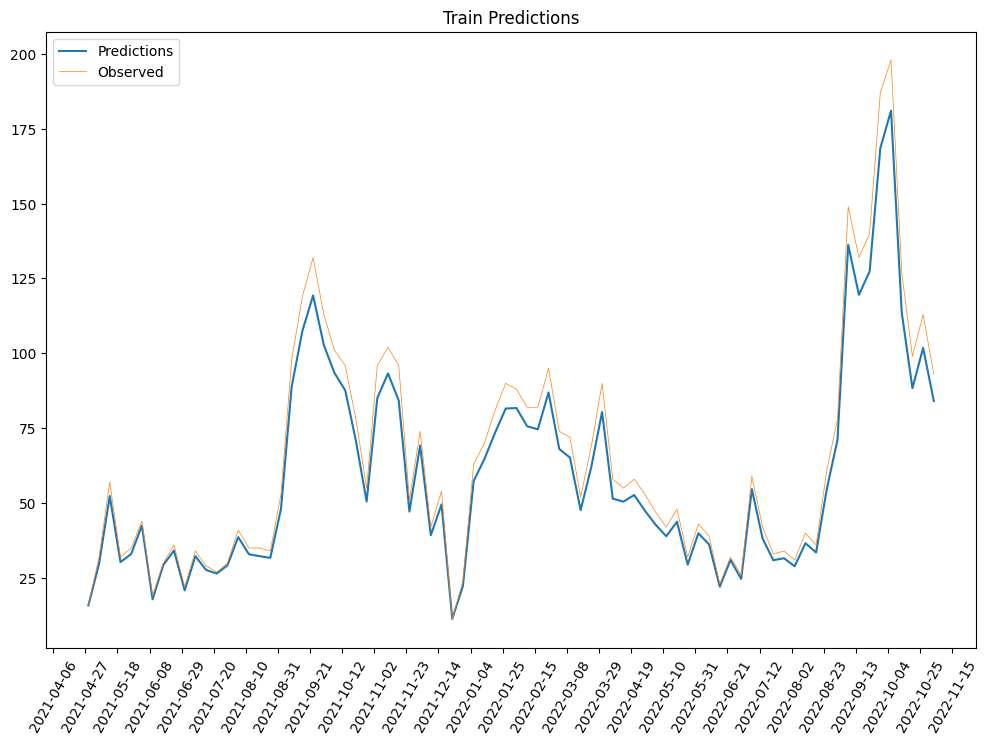

In [519]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

preds = pd.DataFrame({
    'Date': appts_model['Date'][:split_idx],
    'Predictions': x_pred,
    'Observed': appts_model['StudentName'][:split_idx]
})

fig, ax = plt.subplots(figsize=(12,8))
plt.title('Train Predictions')
ax.plot('Date', 'Predictions', data=preds, label='Predictions')
ax.plot('Date', 'Observed', data=preds, label='Observed', linewidth=0.5) # set alpha to 0.5 for the Observed line
plt.xticks(rotation=60)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=3))
ax.legend()
plt.show()

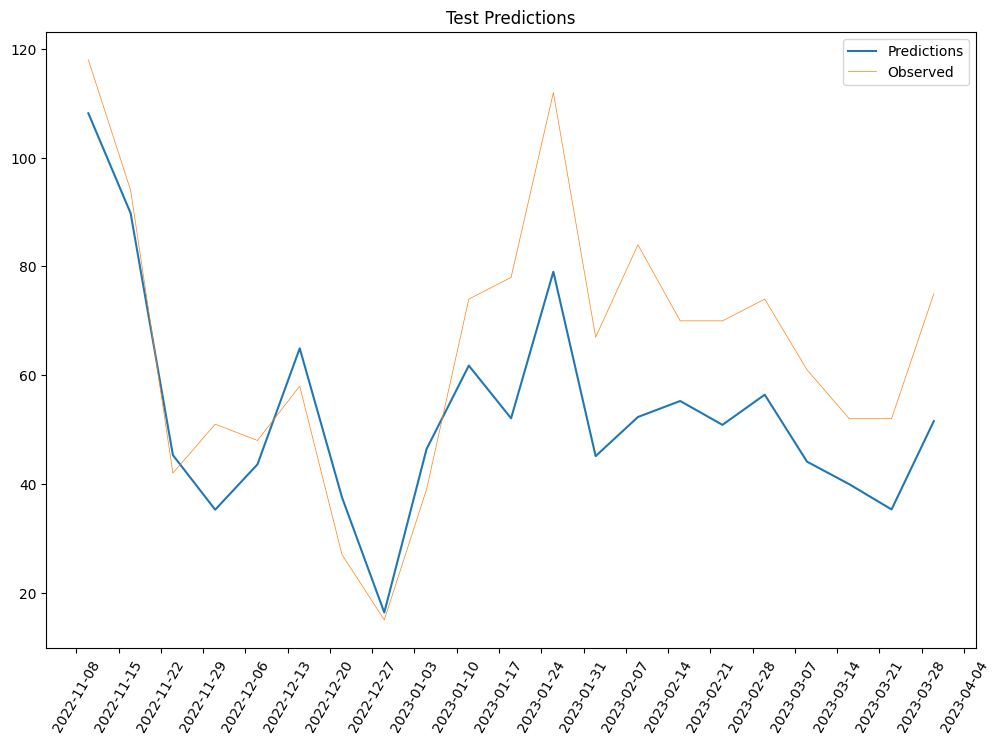

In [520]:
import matplotlib.pyplot as plt
preds = pd.DataFrame({
    'Date': appts_model['Date'][split_idx:],
    'Predictions': y_pred,
    'Observed': appts_model['StudentName'][split_idx:]
})

fig, ax = plt.subplots(figsize=(12,8))
plt.title('Test Predictions')
ax.plot('Date', 'Predictions', data=preds, label='Predictions')
ax.plot('Date', 'Observed', data=preds, label='Observed', linewidth=0.5) # set alpha to 0.5 for the Observed line
plt.xticks(rotation=60)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.legend()
plt.show()

In [521]:
# Predict next 2 months
# Prepare the data
new_data = pd.DataFrame(appts).tail(60)

def next_2months(date):
  date += timedelta(days=60)
  date = date.strftime('%Y-%m-%d')
  date = pd.to_datetime(date)
  return date

def extract_year(col):
  #col = datetime.strptime(col, '%Y-%m-%d')
  year = col.year
  return int(year)

def extract_month(col):
  #col = datetime.strptime(col, '%Y-%m-%d')
  month = col.month
  return int(month)

def extract_day(col):
  #col = datetime.strptime(col, '%Y-%m-%d')
  day = col.day
  return int(day)

#new_data['Date'] = pd.to_datetime(new_data['Date'])
new_data['Date'] = new_data['Date'].apply(next_2months)
new_data = new_data.resample('7D', on='Date').sum().reset_index()
new_data['Year'] = new_data['Date'].apply(extract_year)
new_data['Month'] = new_data['Date'].apply(extract_month)
new_data['Day'] = new_data['Date'].apply(extract_day)
new_data.iloc[:, 2:] = scaler.transform(new_data.iloc[:, 2:])
new_data.head()

X = new_data.drop(['StudentName', 'Date'], axis=1).values
y = appts_model['StudentName'].tail(60).values

#Reshape X to match LSTM input shape
X = X.reshape((X.shape[0], 1, X.shape[1]))
X.shape
new_pred = model.predict(X)
new_pred = [x[0] for x in new_pred]
new_pred[:5]

1/1 [==============================] - 0s 41ms/step


<ipython-input-521-747935135d02>:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_data = new_data.resample('7D', on='Date').sum().reset_index()


[103.718376, 140.67496, 110.824486, 134.80693, 128.14412]

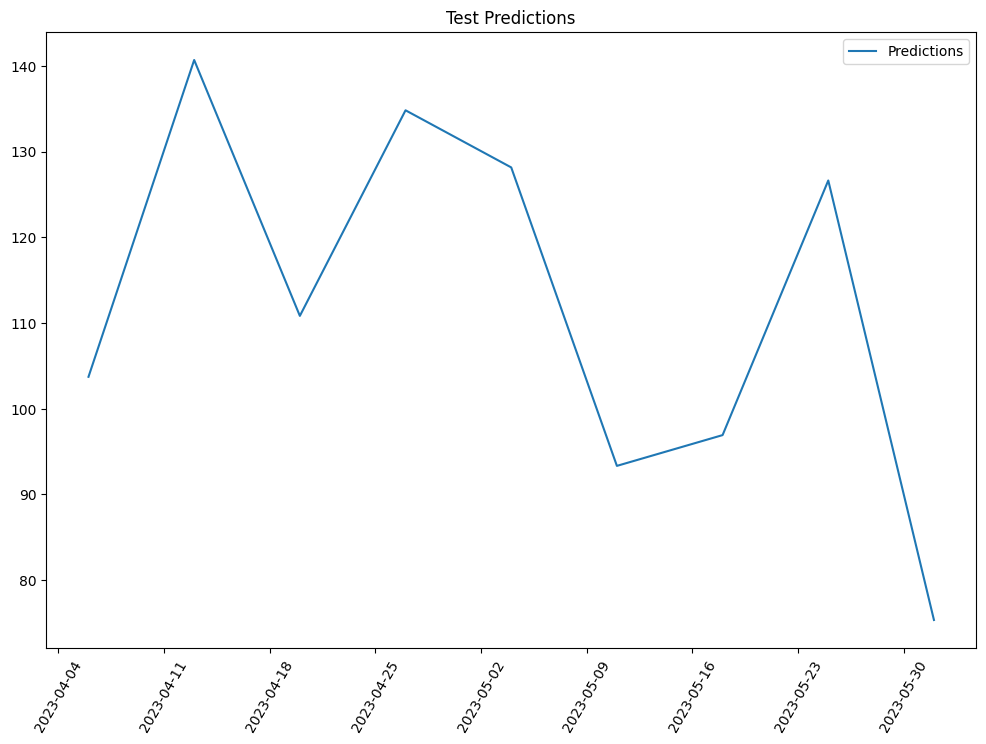

In [522]:
import matplotlib.pyplot as plt
preds = pd.DataFrame({
    'Date': new_data['Date'],
    'Predictions': new_pred
})

fig, ax = plt.subplots(figsize=(12,8))
plt.title('Test Predictions')
ax.plot('Date', 'Predictions', data=preds, label='Predictions')
plt.xticks(rotation=60)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.legend()
plt.show()

In [524]:
import plotly.graph_objs as go
import pandas as pd

# Create a DataFrame with the data
preds = pd.DataFrame({
    'Date': new_data['Date'],
    'Predictions': new_pred
})

# Create a trace for the predictions
trace = go.Scatter(x=preds['Date'], y=preds['Predictions'], name='Predictions')

# Create a layout for the graph
layout = go.Layout(
    title='Next 2 months Predictions',
    xaxis=dict(title='Date', tickangle=60),
    yaxis=dict(title='Predictions'),
)

# Create a figure and add the trace and layout
fig = go.Figure(data=[trace], layout=layout)

# Show the graph
fig.show()

In [523]:
# # Define the LSTM model for Date column
# from keras.models import Sequential
# from keras.layers import Dense, LSTM, Dropout
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder

# # Prepare the data for the LSTM
# X_date = appts_model['Date'].values.reshape((-1, 1))
# y = appts_model['StudentName_x'].values

# # Reshape X_date to match LSTM input shape
# X_date = X_date.reshape((X_date.shape[0], 1, X_date.shape[1]))

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(appts_model['Date'], appts_model.drop(['Date', 'StudentName_x'], axis=1), test_size=0.2, shuffle=False)

# # Encode the Date column
# date_encoder = OneHotEncoder(sparse=False)
# X_date_train_encoded = date_encoder.fit_transform(X_train.values.reshape(-1, 1))
# X_date_test_encoded = date_encoder.transform(X_test.values.reshape(-1, 1))

# # Reshape the encoded Date features for LSTM input shape
# X_date_train_encoded = X_date_train_encoded.reshape(X_date_train_encoded.shape[0], 1, X_date_train_encoded.shape[1])
# X_date_test_encoded = X_date_test_encoded.reshape(X_date_test_encoded.shape[0], 1, X_date_test_encoded.shape[1])

# # Define the LSTM model
# lstm_model = Sequential()
# lstm_model.add(LSTM(64, input_shape=(1, X_date_train_encoded.shape[2]), activation='relu'))
# lstm_model.add(Dense(1, activation='linear'))
# lstm_model.compile(optimizer='adam', loss='mse')

# # Train the LSTM model
# lstm_model.fit(X_date_train_encoded, y_train['StudentName_x'], epochs=50, batch_size=32)

# # Define the other model
# other_model = Sequential()
# other_model.add(Dense(128, input_dim=X_other_train.shape[1], activation='relu'))
# other_model.add(Dense(64, activation='relu'))
# other_model.add(Dense(32, activation='relu'))
# other_model.add(Dense(1, activation='linear'))
# other_model.compile(optimizer='adam', loss='mse')

# # Train the other model
# other_model.fit(X_other_train, y_train['StudentName_x'], epochs=50, batch_size=32)

# # Evaluate both models on the test data
# lstm_score = lstm_model.evaluate(X_date_test_encoded, y_test['StudentName_x'])
# other_score = other_model.evaluate(X_other_test, y_test['StudentName_x'])

# print(f"LSTM model test loss: {lstm_score:.4f}")
# print(f"Other model test loss: {other_score:.4f}")

# # Concatenate the encoded Date features with the other features
# X_train_final = np.concatenate([X_date_train_encoded, X_other_train], axis=2)
# X_test_final = np.concatenate([X_date_test_encoded, X_other_test], axis=2)

# # Define the final model with LSTM layer and other layers
# final_model = Sequential()
# final_model.add(LSTM(64, input_shape=(1, X_train_final.shape[2]), activation='relu'))
# final_model.add(Dense(128, activation='relu'))
# final_model.add(Dense(64, activation='relu'))
# final_model.add(Dense(32, activation='relu'))
# final_model.add(Dense(1, activation='linear'))
# final_model.compile(optimizer='adam', loss='mse')

# # Train the final model
# final_model.fit(X_train_final, y_train['StudentName_x'], epochs=50, batch_size=32)

# # Evaluate the final model on the test data
# final_score = final_model.evaluate(X_test_final, y_test['StudentName_x'])
# print(f"Final model test loss: {final_score:.4f}")